In [2]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../Data/laptop_prices - laptop_prices.csv')

In [4]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [5]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [6]:
df['Weight'].max()

4.7

In [7]:
df.shape

(1275, 23)

In [8]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [10]:
df.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [11]:
df.duplicated().sum()

0

# Feature engineering 


In [12]:
# covert euro into rupess
df['Price'] = df['Price_euros']*102.3
df = df.drop(['Price_euros'], axis = 1)

In [13]:
# waight convert kg into gram
df['Weight'] = (df['Weight']*1000).astype('int')

In [14]:
def display_size(x):
    if x >= 10 and x < 13:
        return 'Small'
    
    elif x >= 13 and x < 15:
        return 'Average'
    
    elif x >= 15 and x < 17:
        return  'Large'
    
    elif x >= 16 and x < 20:
        return  'Extra Large'    
    else:
        return 'Other'

    
df['Display_Size'] = df['Inches'].apply(display_size)

In [15]:
def weight_category(x):
    if x >= 650 and x < 1700:
        return 'Light_weight'
    elif x >= 1700 and x < 3000:
        return 'Average_weight'
    elif x >= 3000 and x < 5000:
        return 'Heavy_weight'
    else:
        return 'Other'

df['Weight_category'] = df['Weight'].apply(weight_category)

In [16]:
df['Weight_per_inch'] = df['Weight'] / df['Inches']

In [17]:
brand_category = {
    "Apple": "Premium",
    "MSI": "Premium",
    "Razer": "Premium",
    "Microsoft": "Premium",
    "Google": "Premium",
    "Samsung": "Premium",

    "Dell": "Mid-range",
    "HP": "Mid-range",
    "Lenovo": "Mid-range",
    "Asus": "Mid-range",
    "Huawei": "Mid-range",
    "LG": "Mid-range",

    "Acer": "Budget",
    "Toshiba": "Budget",
    "Xiaomi": "Budget",
    "Vero": "Budget",
    "Mediacom": "Budget",
    "Chuwi": "Budget",
    "Fujitsu": "Budget"
}

df["Brand_Category"] = df["Company"].map(brand_category)

In [18]:
# df = df.drop(['SecondaryStorage'], axis  =1)

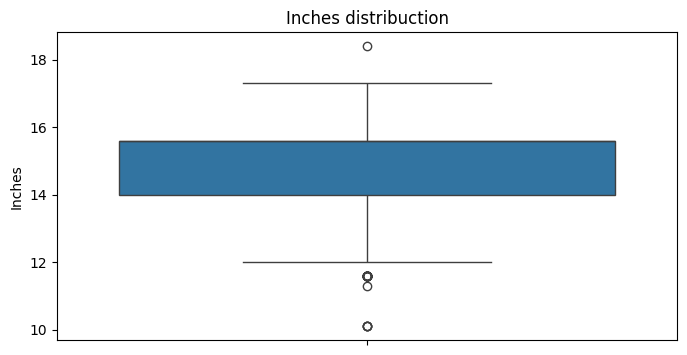

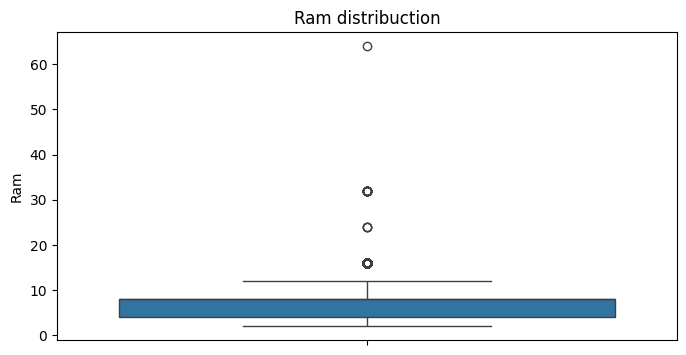

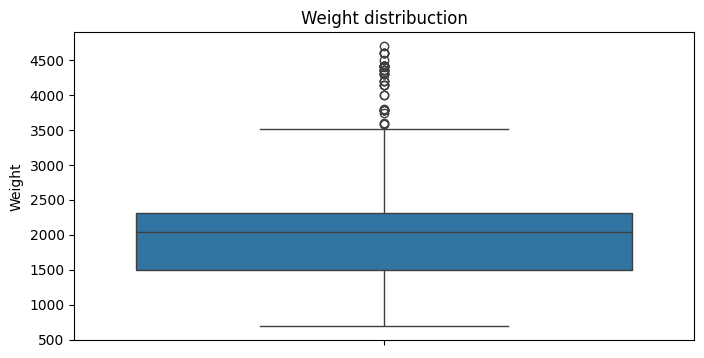

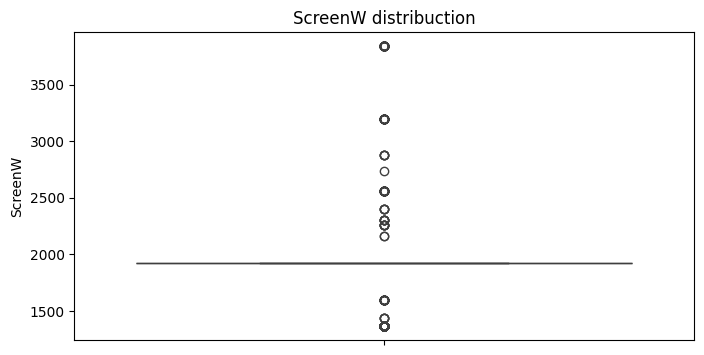

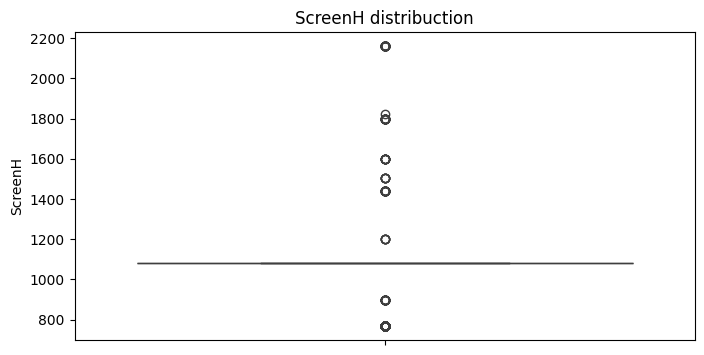

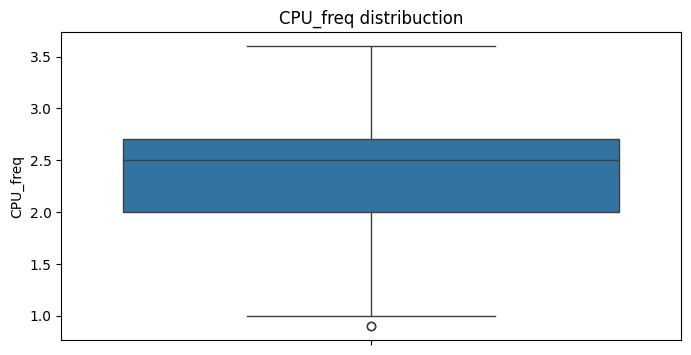

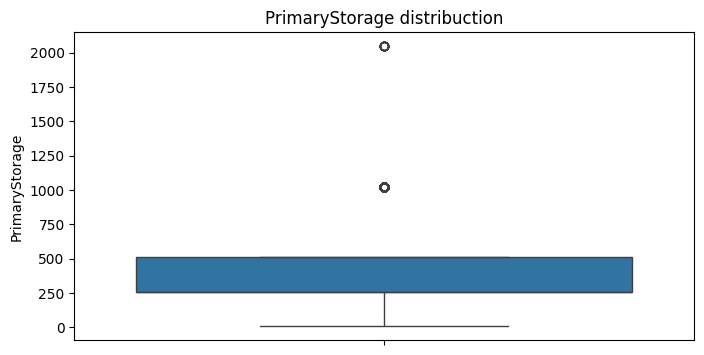

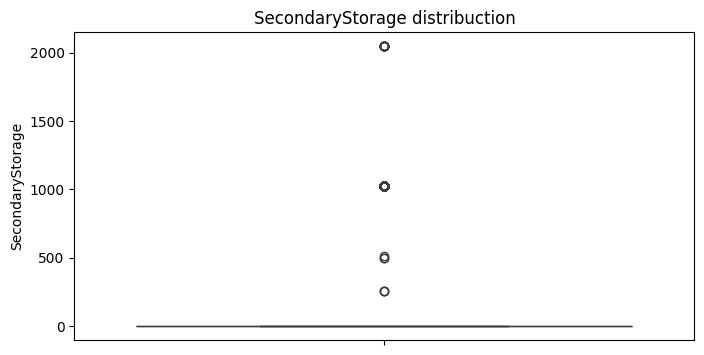

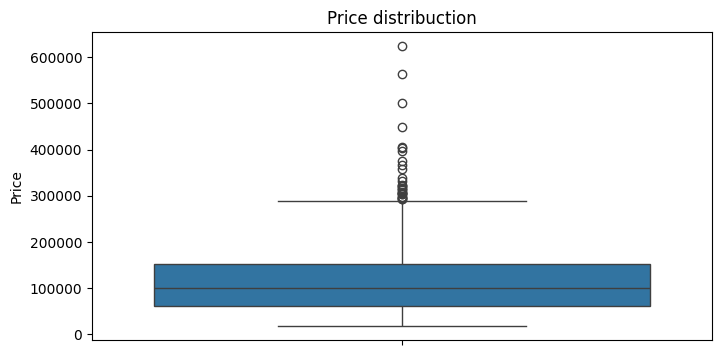

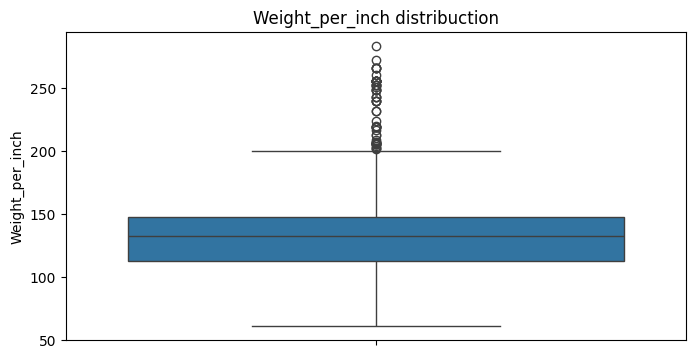

In [19]:
num_col = df.select_dtypes(['int', 'float'])
for col in num_col: 
    plt.figure(figsize = (8,4))
    sns.boxplot(df[col])
    plt.title(f'{col} distribuction')
    plt.show()

Remove outliers

In [20]:
columns = ['PrimaryStorage', 'Price', 'Ram']
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    median = df[col].median()
    outliers = (df[col] < lower_limit) | (df[col] > upper_limit)
    df.loc[outliers, col] = median

In [21]:
df['Price'].max()

288895.2

In [22]:
# df = df.drop(['CPU_model','PrimaryStorage'], axis = 1)

In [23]:
# df.to_csv('Clean_data.csv', index = False)

In [24]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Screen', 'ScreenW', 'ScreenH', 'Touchscreen', 'IPSpanel',
       'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model', 'Price',
       'Display_Size', 'Weight_category', 'Weight_per_inch', 'Brand_Category'],
      dtype='object')

In [25]:
df.select_dtypes(['int', 'float']).columns

Index(['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'CPU_freq',
       'PrimaryStorage', 'SecondaryStorage', 'Price', 'Weight_per_inch'],
      dtype='object')

In [26]:
# df.columns